# TidyTuesday 2024-03-05 - Python

This is my first attempt to conquer a tidyTuesday using python.

Sources:
- https://github.com/rfordatascience/tidytuesday/blob/master/data/2024/2024-03-05/readme.md
- https://www.mrtrashwheel.com
- https://docs.google.com/spreadsheets/d/1b8Lbe-z3PNb3H8nSsSjrwK2B0ReAblL2/edit#gid=1143432795
- https://en.wikipedia.org/wiki/Mr._Trash_Wheel


![Mr Trashwheel, image from wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Mr._Trash_Wheel_%2827582099121%29.jpg/1280px-Mr._Trash_Wheel_%2827582099121%29.jpg)

In [164]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# to beautify our plots
plt.style.use('ggplot')

## First step - doing the preparations like in the description (readme.md on tidytuesday)

In [138]:
# Read the csvs (parse_date has sadly no effect, so we make this after loading the data)
# Each csv contains the data of one 'semi-autonomous trash interceptor'

# I need some attempts to find the best settings for reading the data correctly

column_dtypes = { 
    'Dumpster': np.float32,
    'Year': np.float32,
    'Weight (tons)': np.float32,
    'Volume (cubic yards)': np.float32,
    'Plastic Bottles' :np.float32,
    'Polystyrene': np.float32,
    'Cigarette Butts': np.float32,
    'Glass Bottles': np.float32,
    'Plastic Bags': np.float32,
    'Wrappers': np.float32,
    'Sports Balls': np.float32,
    'Homes Powered*': np.float32
}

mrtrash = pd.read_csv('./data/mrtrashwheel.csv', skiprows=1, dtype=column_dtypes, thousands=',', decimal='.')
professortrash = pd.read_csv('./data/professortrashwheel.csv', skiprows=1, dtype=column_dtypes, thousands=',', decimal='.')
captaintrash = pd.read_csv('./data/captaintrashwheel.csv', skiprows=1, dtype=column_dtypes, thousands=',', decimal='.')
gwynndatrash = pd.read_csv('./data/gwynndatrashwheel.csv', skiprows=1, dtype=column_dtypes, thousands=',', decimal='.')

In [139]:
mrtrash.head()

,Dumpster,Month,Year,Date,Weight (tons),Volume (cubic yards),Plastic Bottles,Polystyrene,Cigarette Butts,Glass Bottles,Plastic Bags,Wrappers,Sports Balls,Homes Powered*,Unnamed: 14,Unnamed: 15
0,1.0,May,2014.0,5/16/2014,4.31,18.0,1450.0,1820.0,126000.0,72.0,584.0,1162.0,7.0,0.0,NaN,NaN
1,2.0,May,2014.0,5/16/2014,2.74,13.0,1120.0,1030.0,91000.0,42.0,496.0,874.0,5.0,0.0,NaN,NaN
2,3.0,May,2014.0,5/16/2014,3.45,15.0,2450.0,3100.0,105000.0,50.0,1080.0,2032.0,6.0,0.0,NaN,NaN
3,4.0,May,2014.0,5/17/2014,3.10,15.0,2380.0,2730.0,100000.0,52.0,896.0,1971.0,6.0,0.0,NaN,NaN
4,5.0,May,2014.0,5/17/2014,4.06,18.0,980.0,870.0,120000.0,72.0,368.0,753.0,7.0,0.0,NaN,NaN


Following table shows what we see in each column (source: https://github.com/rfordatascience/tidytuesday/blob/master/data/2024/2024-03-05/readme.md)

We can use these information for setting correct data types.

|variable       |class     |description    |
|:--------------|:---------|:--------------|
|ID             |character |Short name for the Trash Wheel             |
|Name           |character |Name of the Trash Wheel           |
|Dumpster       |double    |Dumpster number       |
|Month          |character |Month          |
|Year           |double    |Year           |
|Date           |character |Date           |
|Weight         |double    |Weight in tons         |
|Volume         |double    |Volume in cubic yards          |
|PlasticBottles |double    |Number of plastic bottles |
|Polystyrene    |double    |Number of polystyrene items    |
|CigaretteButts |double    |Number of cigarette butts |
|GlassBottles   |double    |Number of glass bottles   |
|PlasticBags    |double    |Number of plastic bags    |
|Wrappers       |double    |Number of wrappers       |
|SportsBalls    |double    |Number of sports balls    |
|HomesPowered   |double    |Homes Powered - Each ton of trash equates to on average 500 kilowatts of electricity.  An average household will use 30 kilowatts per day.   |



There seems to be some problem in the csv. we have 'Unnamend: XY' columns
Lets make this easy and get only the columns we know we want.

In [140]:
mrtrash = mrtrash[['Dumpster', 'Month', 'Year', 'Date', 'Weight (tons)',
       'Volume (cubic yards)', 'Plastic Bottles', 'Polystyrene',
       'Cigarette Butts', 'Glass Bottles', 'Plastic Bags', 'Wrappers',
       'Sports Balls', 'Homes Powered*']]
# The gwynnda seems to not have 'Glass Bottles' and 'Sport Balls'
gwynndatrash = gwynndatrash[['Dumpster', 'Month', 'Year', 'Date', 'Weight (tons)',
       'Volume (cubic yards)', 'Plastic Bottles', 'Polystyrene',
       'Cigarette Butts', 'Plastic Bags', 'Wrappers',
       'Homes Powered*']]
# The captain seems to not have 'Glass Bottles' and 'Sport Balls'
captaintrash = captaintrash[['Dumpster', 'Month', 'Year', 'Date', 'Weight (tons)',
       'Volume (cubic yards)', 'Plastic Bottles', 'Polystyrene',
       'Cigarette Butts', 'Plastic Bags', 'Wrappers',
       'Homes Powered*']]
# The professor seems to not have 'Sports Balls'
professortrash = professortrash[['Dumpster', 'Month', 'Year', 'Date', 'Weight (tons)',
       'Volume (cubic yards)', 'Plastic Bottles', 'Polystyrene',
       'Cigarette Butts', 'Glass Bottles', 'Plastic Bags', 'Wrappers',
       'Homes Powered*']]

First insight is, that we do not have the full column set in all datasets.

Interesting for us here in germany: The unit 'cubic yards' uses the following conversion to the here better understandable 'cubic meter'

1 yd^3 = 0.764554858 m^3
1 m^3 = 1.3079506193 yd^3

source: https://www.unitconverters.net/volume/cubic-yard-to-cubic-meter.htm

Don't know, if i will add an additional column with the metric unit yet. Let's see..

In [141]:
## Tidy column names for better accessing 
tidy_column_names = {
    'Weight (tons)': 'WeightTons',
    'Volume (cubic yards)': 'VolumeCubicYards',
    'Plastic Bottles': 'PlasticBottles',
    'Cigarette Butts': 'CigaretteButts',
    'Glass Bottles': 'GlassBottles',
    'Plastic Bags': 'PlasticBags',
    'Sports Balls': 'SportsBalls',
    'Homes Powered*': 'HomesPowered'
}

mrtrash = mrtrash.rename(columns=tidy_column_names)
professortrash = professortrash.rename(columns=tidy_column_names)
captaintrash = captaintrash.rename(columns=tidy_column_names)
gwynndatrash = gwynndatrash.rename(columns=tidy_column_names)

In [142]:
mrtrash.head(1)

,Dumpster,Month,Year,Date,WeightTons,VolumeCubicYards,PlasticBottles,Polystyrene,CigaretteButts,GlassBottles,PlasticBags,Wrappers,SportsBalls,HomesPowered
0,1.0,May,2014.0,5/16/2014,4.31,18.0,1450.0,1820.0,126000.0,72.0,584.0,1162.0,7.0,0.0


In [143]:
# Add the trash interceptor name as column
mrtrash['Name'] = 'Mister Trash Wheel'
professortrash['Name'] = 'Professor Trash Wheel'
captaintrash['Name'] = 'Captain Trash Wheel'
gwynndatrash['Name'] = 'Gwynnda Trash Wheel'

Since we will join the datasets together to one 'big', we have to add missing columns (SportsBalls and GlassBottles for captain and gwynnda and SportsBalls for the professor)

In [144]:
professortrash['SportsBalls'] = np.nan
captaintrash['SportsBalls'] = np.nan
captaintrash['GlassBottles'] = np.nan
gwynndatrash['SportsBalls'] = np.nan
gwynndatrash['GlassBottles'] = np.nan

So, now we have to adjust the column data types and than put them together to one big file. Hopefully that works without haven the same column ordering. We will see...

In [145]:
professortrash.head()

,Dumpster,Month,Year,Date,WeightTons,VolumeCubicYards,PlasticBottles,Polystyrene,CigaretteButts,GlassBottles,PlasticBags,Wrappers,HomesPowered,Name,SportsBalls
0,1.0,January,2017.0,1/2/2017,1.79,15.0,1950.0,6080.0,19700.0,8.0,3100.0,15600.0,30.0,Professor Trash Wheel,NaN
1,2.0,January,2017.0,1/30/2017,1.58,15.0,9540.0,11230.0,17600.0,14.0,5630.0,16700.0,26.0,Professor Trash Wheel,NaN
2,3.0,February,2017.0,2/26/2017,2.32,18.0,8350.0,9210.0,12000.0,19.0,6430.0,12400.0,39.0,Professor Trash Wheel,NaN
3,4.0,February,2017.0,2/26/2017,3.72,15.0,8590.0,1030.0,13000.0,21.0,5870.0,11030.0,62.0,Professor Trash Wheel,NaN
4,5.0,February,2017.0,2/28/2017,1.45,15.0,7830.0,9950.0,16000.0,18.0,7450.0,15340.0,24.0,Professor Trash Wheel,NaN


In [146]:
professortrash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dumpster          115 non-null    float32
 1   Month             114 non-null    object 
 2   Year              114 non-null    float32
 3   Date              114 non-null    object 
 4   WeightTons        115 non-null    float32
 5   VolumeCubicYards  115 non-null    float32
 6   PlasticBottles    114 non-null    float32
 7   Polystyrene       114 non-null    float32
 8   CigaretteButts    114 non-null    float32
 9   GlassBottles      114 non-null    float32
 10  PlasticBags       114 non-null    float32
 11  Wrappers          114 non-null    float32
 12  HomesPowered      115 non-null    float32
 13  Name              116 non-null    object 
 14  SportsBalls       0 non-null      float64
dtypes: float32(11), float64(1), object(3)
memory usage: 8.7+ KB


What we need to do next is to convert the 'Date' column. At least for me, there was no way to infer the relevant logic in the 'read_csv' call.

The problem is, that we have a slightly mixed format. The main thing is, that the year sometimes comes without century.

See the following rows.

In [147]:
mrtrash[36:39]

,Dumpster,Month,Year,Date,WeightTons,VolumeCubicYards,PlasticBottles,Polystyrene,CigaretteButts,GlassBottles,PlasticBags,Wrappers,SportsBalls,HomesPowered,Name
36,37.0,October,2014.0,10/24/2014,3.50,15.0,3650.0,3880.0,94000.0,51.0,1210.0,1840.0,6.0,0.0,Mister Trash Wheel
37,38.0,November,2014.0,11/06/14,2.70,15.0,760.0,1680.0,22000.0,18.0,960.0,1720.0,6.0,0.0,Mister Trash Wheel
38,39.0,November,2014.0,11/17/14,3.25,18.0,1250.0,2730.0,46000.0,28.0,1130.0,2340.0,7.0,0.0,Mister Trash Wheel


In [148]:
# Create some helpers to tidy date string. We assume that all the data is collected in the 21. century.
def add_20th_century(match):
    month, day, year = match.groups()
    return f'{month}/{day}/20{year}' 
def tidy_year_of_date(datestring):
    return re.sub(r'^(\d{1,2})/(\d{1,2})/(\d{2})$', add_20th_century, datestring)

# lets spend some time creating simple asserts to verfy this nice looking code to work correctly
assert tidy_year_of_date('5/20/01') == '5/20/2001', f'no century was seems to be added'
assert tidy_year_of_date('11/06/14') == '11/06/2014', f'no century was seems to be added'
assert tidy_year_of_date('11/7/18') == '11/7/2018', f'no century was seems to be added'
assert tidy_year_of_date('1/1/2023') == '1/1/2023', f'no need to add century to date.'


In [149]:
gwynndatrash['Date'].isnull().value_counts()

Date
False    220
True       1
Name: count, dtype: int64

In [150]:
# my super method raises an error so check the nulls (and yes we have some)
#see: mrtrash.loc[(mrtrash['Date'].isnull())]
# to keep it simple we drop them.
mrtrash = mrtrash.dropna(subset=['Date'])
professortrash = professortrash.dropna(subset=['Date'])
captaintrash = captaintrash.dropna(subset=['Date'])
gwynndatrash = gwynndatrash.dropna(subset=['Date'])

In [151]:
# ok. now lets tidy the date with our beautiful function
mrtrash['Date'] = mrtrash['Date'].apply(tidy_year_of_date).astype('datetime64[ns]')
professortrash['Date'] = professortrash['Date'].apply(tidy_year_of_date).astype('datetime64[ns]')
captaintrash['Date'] = captaintrash['Date'].apply(tidy_year_of_date).astype('datetime64[ns]')
gwynndatrash['Date'] = gwynndatrash['Date'].apply(tidy_year_of_date).astype('datetime64[ns]')

In [152]:
print(mrtrash['Date'].info())
print(professortrash['Date'].info())
print(captaintrash['Date'].info())
print(gwynndatrash['Date'].info())

<class 'pandas.core.series.Series'>
Index: 629 entries, 0 to 628
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
629 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 9.8 KB
None
<class 'pandas.core.series.Series'>
Index: 114 entries, 0 to 113
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
114 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.8 KB
None
<class 'pandas.core.series.Series'>
Index: 30 entries, 0 to 29
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
30 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 480.0 bytes
None
<class 'pandas.core.series.Series'>
Index: 220 entries, 0 to 219
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
220 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.4 KB
None


Now lets put them all together and save them into one dataset

In [155]:
alltrashwheels = pd.concat([mrtrash, professortrash, captaintrash, gwynndatrash], ignore_index=True)

C:\Users\Wolfi\AppData\Local\Temp\ipykernel_13360\1029396033.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  alltrashwheels = pd.concat([mrtrash, professortrash, captaintrash, gwynndatrash], ignore_index=True)


In [159]:
# We save using defaults. so keep in mind, that this means: decimal . and thousands ,
alltrashwheels.to_csv('./data/alltrashwheels.csv', index=False)

## Analyse the data
As a starter we think about what was questioned in the readme from rfordatascience

"What type of trash is collected the most? Do the different Trash Wheels collect different sets of trash? Are there times of the year when more or less trash is collected?"

In [160]:
alltrashwheels.columns

Index(['Dumpster', 'Month', 'Year', 'Date', 'WeightTons', 'VolumeCubicYards',
       'PlasticBottles', 'Polystyrene', 'CigaretteButts', 'GlassBottles',
       'PlasticBags', 'Wrappers', 'SportsBalls', 'HomesPowered', 'Name'],
      dtype='object')

PlasticBottles     2201576.0
Polystyrene        1425374.0
CigaretteButts    13618298.0
GlassBottles         15549.0
PlasticBags         976127.0
Wrappers           1900711.0
SportsBalls           8551.0
dtype: float32

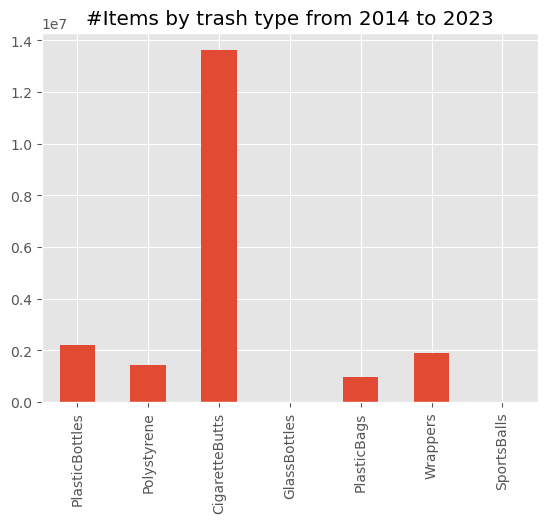

In [179]:
trash_columns = ['PlasticBottles', 'Polystyrene', 'CigaretteButts', 'GlassBottles',
       'PlasticBags', 'Wrappers', 'SportsBalls']
alltrashwheels[trash_columns].sum().plot(kind='bar', title='#Items by trash type from 2014 to 2023')
alltrashwheels[trash_columns].sum()

Not optimal. Since these tiny cigarette butts are so over represented, it looks like no bottles were collected at all.

Let's see how the proportions develop over time.

<Axes: xlabel='Year'>

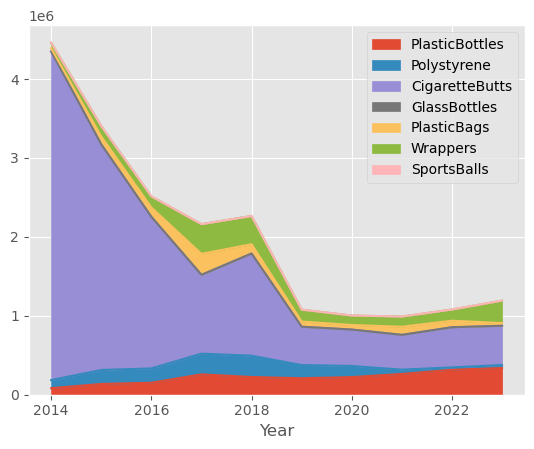

In [180]:
alltrashwheels.groupby('Year')[trash_columns].sum().plot(kind='area')

Interesting. That looks like the amount of cigarette butts decrease over the time.
Maybe many people stopped smoking between 2014 and 2017 (to be honest, i don't think so.). Maybe someone told them not to throw the cigarette butts in the water.. or maybe i did some mistake while loading may data (no no no :)).
I continue thinking...